##### Dependencies

In [53]:
import numpy as np

from sklearn import datasets
from sklearn import datasets, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

##### DRY

In [54]:
# Metrics

def show_confusion_matrix(Y_test, Y_pred, labels):
    cm = confusion_matrix(Y_test, Y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
    disp.plot()


def plot_roc_curve(dataset):
    X = dataset.data
    y = dataset.target
    target_names = dataset.target_names

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

    # Binarize the target classes
    Y_test = label_binarize(y_test, classes=np.unique(y))
    n_classes = Y_test.shape[1]

    # Fit the k-nearest neighbors model
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)

    # Predict the test set probabilities
    y_score = clf.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure()
    lw = 2
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(target_names[i], roc_auc[i]))

    # Plot chance line
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)

    # Set plot parameters
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for {0} dataset'.format(dataset['DESCR'].split('\n')[0]))
    plt.legend(loc="lower right")
    plt.show()

# Assignment 1 - Classification

### k-Nearest Neighbors

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.50      1.00      0.67         2
           2       1.00      0.75      0.86         4

    accuracy                           0.87        15
   macro avg       0.83      0.88      0.82        15
weighted avg       0.93      0.87      0.88        15



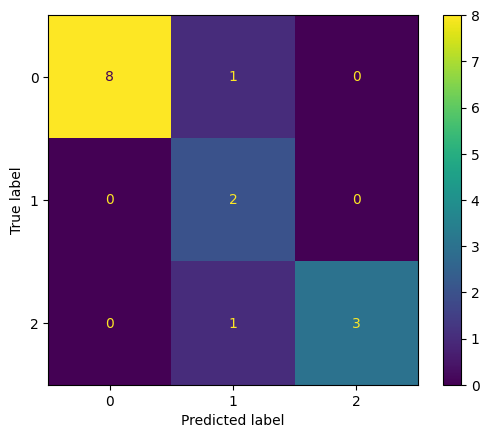

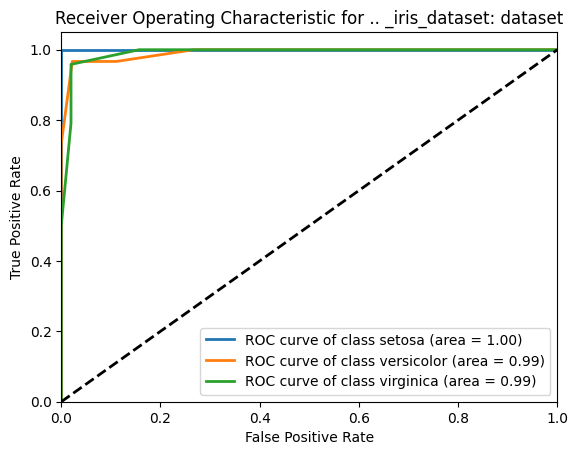

In [55]:
def k_nearest_neighbors(dataset, neighbors=5):
    X = dataset.data[:, :2]
    Y = dataset.target

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)


    show_confusion_matrix(Y_test, Y_pred, labels=knn.classes_)

    target_names = [str(x) for x in knn.classes_]
    print(classification_report(Y_test, Y_pred, target_names=target_names, zero_division=0))

    plot_roc_curve(dataset)


iris = datasets.load_iris()
k_nearest_neighbors(iris, neighbors=5)

# wine = datasets.load_wine()
# k_nearest_neighbors(wine, neighbors=5)

# digits = datasets.load_digits()
# k_nearest_neighbors(digits, neighbors=5)

### Support Vector Machines

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



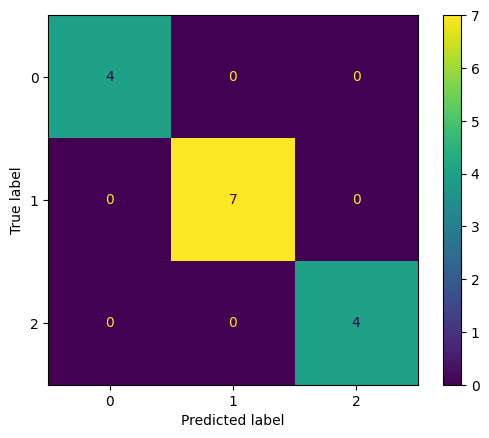

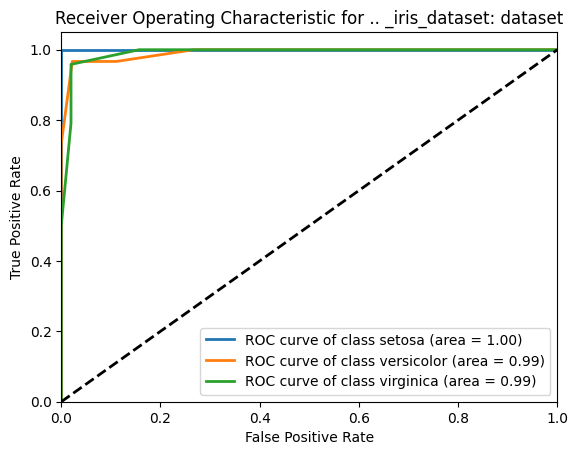

In [56]:
def svm_on_dataset(dataset, kernel='linear'):
    X = dataset.data
    y = dataset.target
    classes=np.unique(y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

    clf = svm.SVC(kernel=kernel, C=1.0, random_state=0)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)

    show_confusion_matrix(Y_test, Y_pred, classes)

    target_names = [str(x) for x in classes]
    print(classification_report(Y_test, Y_pred, target_names=target_names))

    plot_roc_curve(dataset)


iris = datasets.load_iris()
svm_on_dataset(iris)

# wine = datasets.load_wine()
# svm_on_dataset(wine)

# digits = datasets.load_digits()
# svm_on_dataset(digits)

### Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.86      0.92         7
           2       0.80      1.00      0.89         4

    accuracy                           0.93        15
   macro avg       0.93      0.95      0.94        15
weighted avg       0.95      0.93      0.93        15



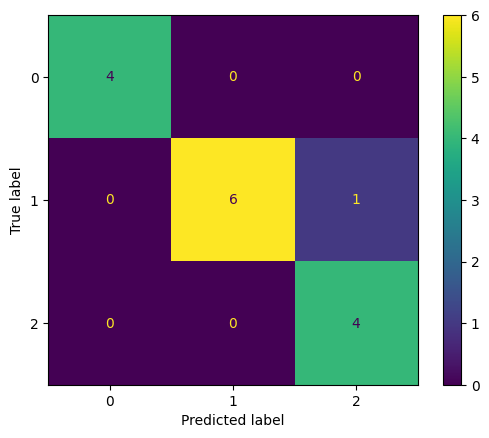

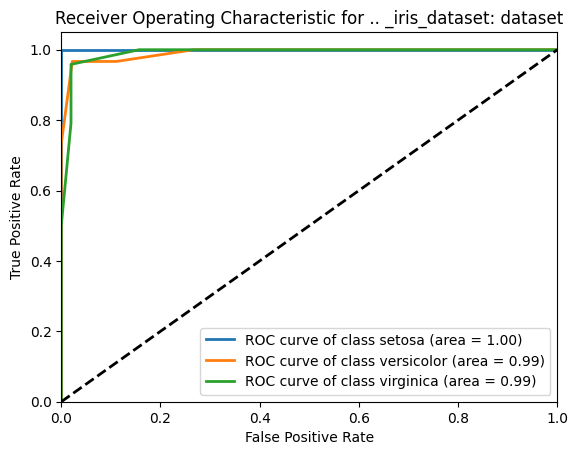

In [57]:
def decision_tree_on_dataset(dataset):
    X = dataset.data
    y = dataset.target
    classes=np.unique(y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)

    show_confusion_matrix(Y_test, Y_pred, classes)

    target_names = [str(x) for x in classes]
    print(classification_report(Y_test, Y_pred, target_names=target_names))

    plot_roc_curve(dataset)


iris = datasets.load_iris()
decision_tree_on_dataset(iris)

# wine = datasets.load_wine()
# decision_tree_on_dataset(wine)

# digits = datasets.load_digits()
# decision_tree_on_dataset(digits)

### Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



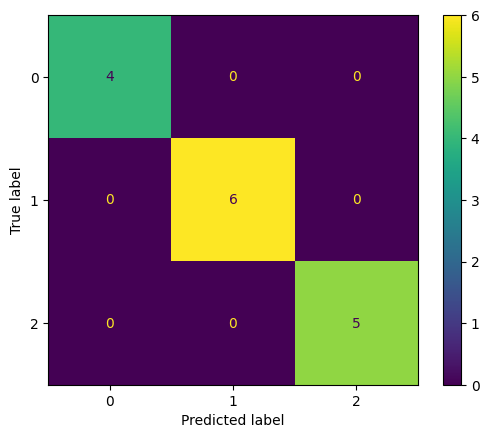

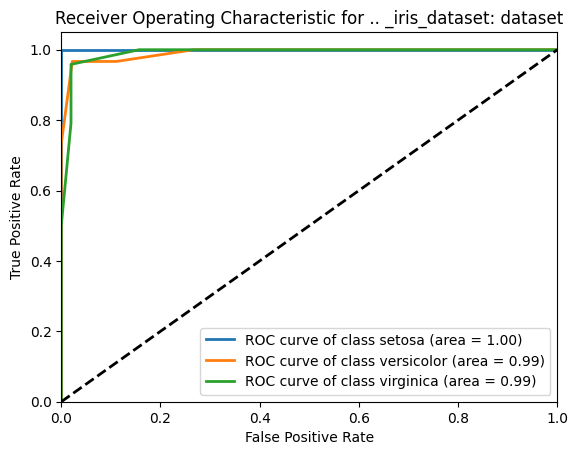

In [58]:
def random_forest_on_dataset(dataset):
    X = dataset.data
    y = dataset.target
    classes=np.unique(y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

    fst = RandomForestClassifier(max_depth=2, random_state=0)
    fst.fit(X_train, Y_train)
    Y_pred = fst.predict(X_test)

    show_confusion_matrix(Y_test, Y_pred, classes)

    target_names = [str(x) for x in classes]
    print(classification_report(Y_test, Y_pred, target_names=target_names))

    plot_roc_curve(dataset)


iris = datasets.load_iris()
random_forest_on_dataset(iris)

# wine = datasets.load_wine()
# random_forest_on_dataset(wine)

# digits = datasets.load_digits()
# random_forest_on_dataset(digits)

# Assignment 2 - Clustering

# Assignment 3 - Real World Data Classification

                 precision    recall  f1-score   support

tested_negative       0.83      0.81      0.82       107
tested_positive       0.59      0.62      0.60        47

       accuracy                           0.75       154
      macro avg       0.71      0.72      0.71       154
   weighted avg       0.76      0.75      0.75       154



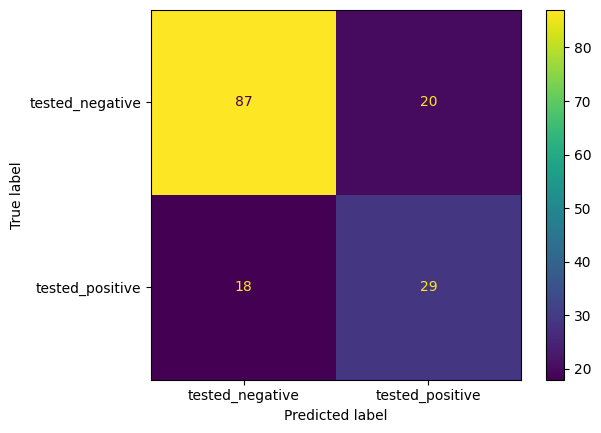

In [59]:
df = pd.read_csv("dataset_37_diabetes.csv")

diabetic_patients = len(df[df['\'class\''] == "tested_positive"])
healthy_patients = len(df[df['\'class\''] == "tested_negative"])

X = df.drop(['\'class\''], axis=1)
Y = df['\'class\'']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)


show_confusion_matrix(Y_test, Y_pred, labels=knn.classes_)

target_names = [str(x) for x in knn.classes_]
print(classification_report(Y_test, Y_pred, target_names=target_names, zero_division=0))